In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [7]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [8]:
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

In [10]:
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\Users\Afrid\Anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


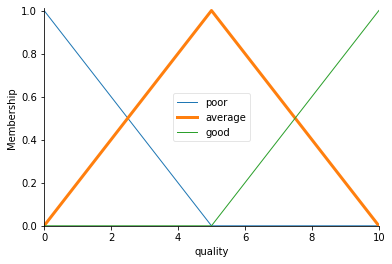

In [11]:
# You can see how these look with .view()
quality['average'].view()

C:\Users\Afrid\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


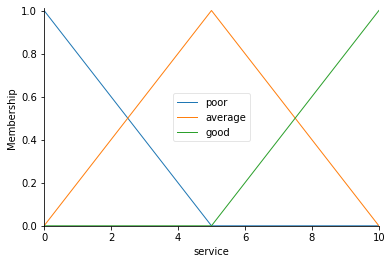

In [12]:
service.view()

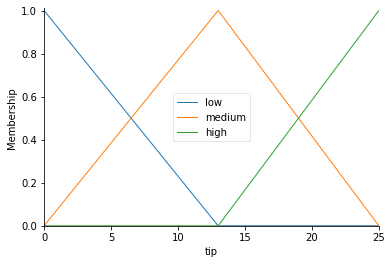

In [13]:
tip.view()

C:\Users\Afrid\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Afrid\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x205eaa17208>)

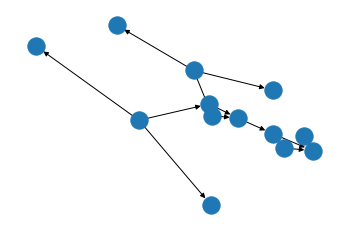

In [14]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

In [15]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [16]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [17]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607361963192


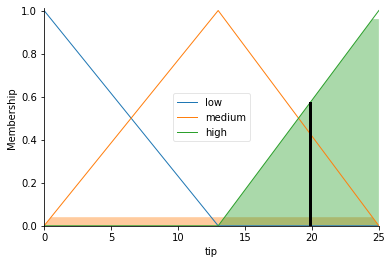

In [19]:
print(tipping.output['tip'])
tip.view(sim=tipping)

# Implementation

In [8]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl


In [9]:
weight = ctrl.Antecedent(np.arange(0, 1001, 150), 'weight')
density = ctrl.Antecedent(np.arange(0, 12, 1), 'density')
speed = ctrl.Consequent(np.arange(0, 120, 6), 'speed')
weight.automf(3)
density.automf(3)

In [10]:
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 40])
speed['medium'] = fuzz.trimf(speed.universe, [0, 40, 100])
speed['high'] = fuzz.trimf(speed.universe, [40, 100, 120])

In [12]:
rule1 = ctrl.Rule(weight['poor'] | density['poor'], speed['high'])
rule2 = ctrl.Rule(density['average'], speed['medium'])
rule3 = ctrl.Rule(density['good'] | weight['good'], speed['low'])
# rule1.view()

41.7153456077808


C:\Users\Afrid\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


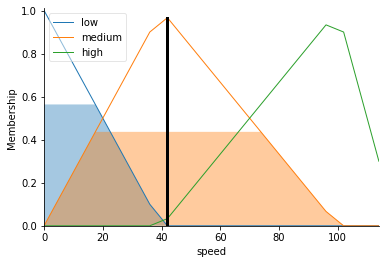

In [13]:
velocity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
velocity = ctrl.ControlSystemSimulation(velocity_ctrl)
velocity.input['weight'] = 530
velocity.input['density'] = 8.6
velocity.compute()
print(velocity.output['speed'])
speed.view(sim=velocity)

394.6446446446446


C:\Users\Afrid\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


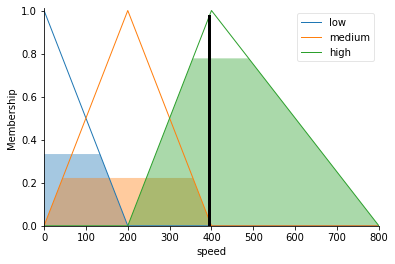

In [30]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
weight = ctrl.Antecedent(np.arange(0, 10, 1), 'weight')
height = ctrl.Antecedent(np.arange(0, 1, 0.1), 'height')
speed = ctrl.Consequent(np.arange(0, 1000, 200), 'speed')
weight.automf(3)
height.automf(3)
speed['low'] = fuzz.trimf(speed.universe, [0, 0, 200])
speed['medium'] = fuzz.trimf(speed.universe, [0, 200, 400])
speed['high'] = fuzz.trimf(speed.universe, [200, 400, 800])
rule1 = ctrl.Rule(weight['poor'] | height['poor'], speed['low'])
rule2 = ctrl.Rule(height['average'], speed['medium'])
rule3 = ctrl.Rule(height['good'] | weight['good'], speed['high'])
velocity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
velocity = ctrl.ControlSystemSimulation(velocity_ctrl)
velocity.input['weight'] = 3
velocity.input['height'] = 0.8
velocity.compute()
print(velocity.output['speed'])
speed.view(sim=velocity)

# fuzzy code for implementation

In [25]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')

In [26]:
weight = ctrl.Antecedent(np.arange(0, 1001, 150), 'weight')
density = ctrl.Antecedent(np.arange(0, 12, 1), 'density')
speed = ctrl.Consequent(np.arange(0, 1400, 200), 'speed')
temp = ctrl.Consequent(np.arange(0, 2000, 200), 'temp')
weight.automf(3)
density.automf(3)

In [27]:
speed['low'] = fuzz.trimf(speed.universe, [0, 300, 600])
speed['medium'] = fuzz.trimf(speed.universe, [400, 700, 1000])
speed['high'] = fuzz.trimf(speed.universe, [800, 1100, 1400])
temp['low'] = fuzz.trimf(temp.universe, [0, 400, 800])
temp['medium'] = fuzz.trimf(temp.universe, [600, 1000, 1400])
temp['high'] = fuzz.trimf(temp.universe, [1200, 1600, 2000])

In [28]:
rule1 = ctrl.Rule(weight['poor'] | density['poor'], speed['low'])
rule2 = ctrl.Rule(density['average']| weight['average'], speed['medium'])
rule3 = ctrl.Rule(density['good'] | weight['good'], speed['high'])
rule4 = ctrl.Rule(density['poor'] | weight['good'], speed['low'])
rule5 = ctrl.Rule(density['good'] | weight['poor'], speed['high'])
rule6 = ctrl.Rule(density['good'] | weight['poor'], temp['low'])
rule7 = ctrl.Rule(density['poor'] | weight['good'], temp['high'])
rule8 = ctrl.Rule(density['poor'] | weight['poor'], temp['low'])
rule9 = ctrl.Rule(density['good'] | weight['poor'], temp['low'])
rule10 = ctrl.Rule(density['average'] | weight['average'], temp['medium'])
rule11 = ctrl.Rule(density['good'] | weight['good'], temp['high'])

In [29]:
velocity_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
velocity = ctrl.ControlSystemSimulation(velocity_ctrl)
velocity.input['weight'] = 530
velocity.input['density'] = 8.6
velocity.compute()
print(velocity.output['speed'])

833.3300877200066


In [30]:
temperature_ctrl = ctrl.ControlSystem([rule11, rule8, rule10])
temperature = ctrl.ControlSystemSimulation(temperature_ctrl)
temperature.input['weight'] = 530
temperature.input['density'] = 8.6
temperature.compute()
print(temperature.output['temp'])

1228.3260009104445


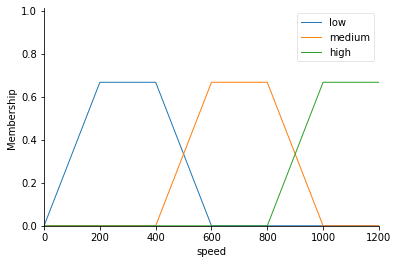

In [31]:
# speed.view(sim=velocity)
speed.view()

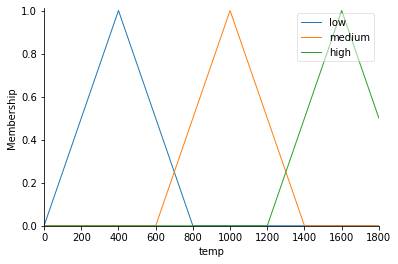

In [32]:
temp.view()